<a href="https://colab.research.google.com/github/akshitt/Audio-Processing/blob/main/Coursera-ASP/Week_3_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fourier Theorems

## Properties of Fourier Transforms

1. Linearity   
<img src='https://snipboard.io/tIl95e.jpg' width='300'>

2. Shifting   
<img src='https://snipboard.io/rZVSMc.jpg' width='220'>

3. Convolution
<img src='https://snipboard.io/9w8ujW.jpg' width='250'>

4. Energy Conversation - Energy can be measured in both, time & frequency domain   
<img src='https://snipboard.io/YQjAk5.jpg' width='270'>
***
<br><br>
- **Amplitude in Decibel** : 20 * log<sub>10</sub>(abs(X))

- **Phase Unwrapping** : Adding 2π wherever discontinuity
<img src='https://snipboard.io/GNPw8a.jpg' width='500'>

- **Zero-Padding** : 
    - Add Zeros at end of signal. 
    - *Zero-Padding* in one domain ⇒ *Interpolated* signal in other domain   
<img src='https://snipboard.io/2qrEQg.jpg' width='500'>


***
<br><br>

## Fast Fourier Transform

- DTF is slow, so FFT
- Restricts input signal to size of 2<sup>n</sup>, break into halves recursively
- DFT ⇒ O(n<sup>2</sup>) ; FFT ⇒ O(nlogn)
- **Zero Phase Windowing** :
    - Padding done in middle to reach size of 2<sup>n</sup>, left and right parts are swapped
    - <img src='https://snipboard.io/62FEq0.jpg' width='500'>


## Complex Sounds

- In speech, *vowels are periodic*, consonants are not
- Spectral Analysis (through sonic visualiser) reveals peaks corresponding to harmonics of vowel sound. No clear peak in consonants.


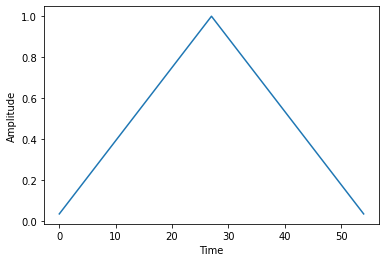

In [1]:
import numpy as np
from scipy.signal import triang 
from scipy.fftpack import fft
import matplotlib.pyplot as plt

x = triang(55) #triangular function

plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.plot(x)

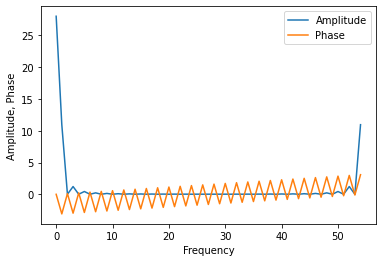

In [2]:
X = fft(x)  #When sizeof(X) isnt 2**n, fft(x) just calculates DFT instead
mX = abs(X) #magnitude
pX = np.angle(X) #phase

# x isn't symmetric around 0, therefor phase is erratic
plt.ylabel('Amplitude, Phase')
plt.xlabel('Frequency')
plt.plot(mX)
plt.plot(pX)
plt.legend(['Amplitude','Phase'])

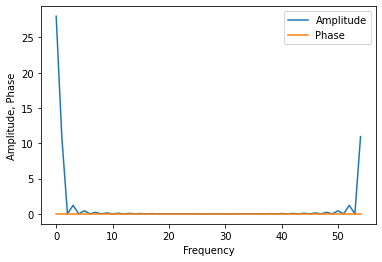

In [3]:
x = triang(55) #triangular function

fft_buffer = np.zeros(55)
fft_buffer[:28] = x[27:]
fft_buffer[28:] = x[:27]

#fft_buffer symmetric around 0 by shifting. No effect on Amplitude. Phase is 0 now. 

X = fft(fft_buffer)  #When sizeof(X) isnt 2**n, fft(x) just calculates DFT instead
mX = abs(X) #magnitude
pX = np.angle(X) #phase

plt.ylabel('Amplitude, Phase')
plt.xlabel('Frequency')
plt.plot(mX)
plt.plot(pX)
plt.legend(['Amplitude','Phase'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


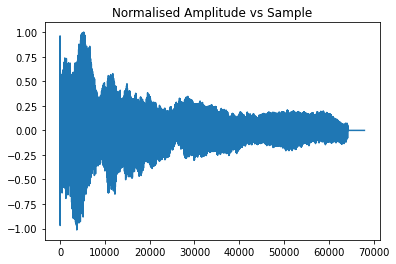

In [50]:
# FFT of real sound

from scipy.io import wavfile
import math
from google.colab import drive
drive.mount('/content/drive')

dir = '/content/drive/My Drive/Summer Projects/Duke/Resources/Audio-Signal-Processing-Coursera'
fs, x = wavfile.read(dir + '/sample-sounds/piano-b.wav')
x = np.transpose(x)[1]
x = x/np.max(x)
plt.title('Normalised Amplitude vs Sample')
plt.plot(x)

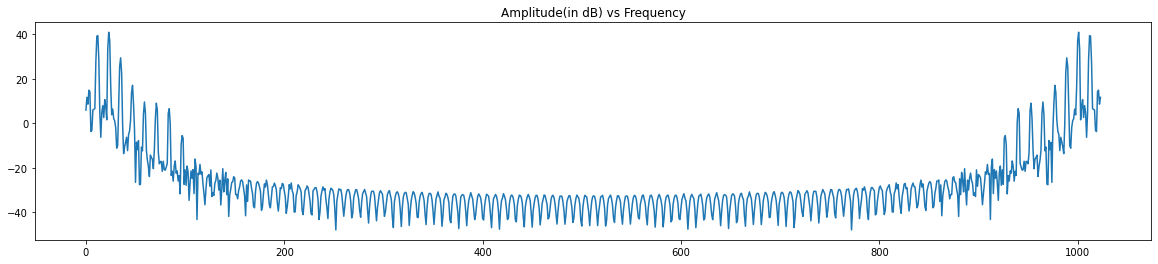

In [58]:
M = 900
hM1 = int(np.floor((M+1)/2))
hM2 = int(np.floor(M/2))

x1 = x[5000:5000+M]*np.hamming(M)

N = 1024
fft_buffer = np.zeros(N)
fft_buffer[:hM1] = x1[hM2:]
fft_buffer[N-hM2:] = x1[:hM2]

X = fft(fft_buffer)
mX = 20*np.log10(abs(X)) 
pX = np.unwrap(np.angle(X))
plt.figure().set_figwidth(20)
# plt.plot(pX)
plt.title('Amplitude(in dB) vs Frequency')
plt.plot(mX)


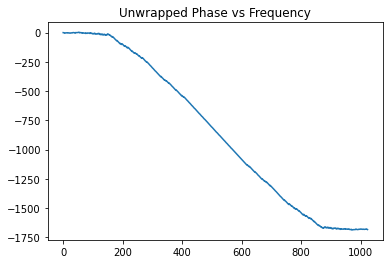

In [59]:
plt.title('Unwrapped Phase vs Frequency')
plt.plot(pX)
